(mutationdominance_vignette)=

# Mutations with variable dominance

:::{versionadded} 0.13.0
:::

The heterozygous effect of a mutation does not need to be constant.
You may use instances of classes derived from {class}`fwdpy11.MutationDominance` to assign functions to generate the dominance of mutations.

The available classes are:

* {class}`fwdpy11.FixedDominance`
  This class is equivalent to passing in a {class}`float` to the `h` `kwarg`.
  See {ref}`here <des_vignette>`
* {class}`fwdpy11.ExponentialDominance`
* {class}`fwdpy11.UniformDominance`
* {class}`fwdpy11.LargeEffectExponentiallyRecessive`

## Example

In [1]:
import fwdpy11

des = fwdpy11.GaussianS(beg=0, end=1, weight=1, sd=0.1,
    h=fwdpy11.LargeEffectExponentiallyRecessive(k=5.0))

If we apply this `des` object to a model of a quantitative trait evolving to a sudden "optimum shift", then we see that the larger effect variants present at the end of the simulation to indeed have smaller dominance coefficients.

In [2]:
pop = fwdpy11.DiploidPopulation(500, 1.0)

rng = fwdpy11.GSLrng(54321)

GSSmo = fwdpy11.GSSmo(
    [
        fwdpy11.Optimum(when=0, optimum=0.0, VS=1.0),
        fwdpy11.Optimum(when=10 * pop.N, optimum=1.0, VS=1.0),
    ]
)

rho = 1000.

p = {
    "nregions": [],
    "gvalue": fwdpy11.Additive(2.0, GSSmo),
    "sregions": [des],
    "recregions": [fwdpy11.PoissonInterval(0, 1., rho / float(4 * pop.N))],
    "rates": (0.0, 1e-3, None),
    "prune_selected": False,
    "demography": fwdpy11.DiscreteDemography(),
    "simlen": 10 * pop.N + 200,
}
params = fwdpy11.ModelParams(**p)

fwdpy11.evolvets(rng, pop, params, 100, suppress_table_indexing=True)

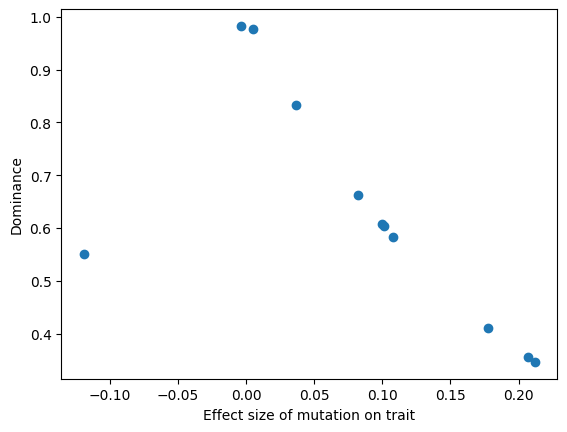

In [3]:
import matplotlib.pyplot as plt
esize = [pop.mutations[m.key].s for m in pop.tables.mutations]
h = [pop.mutations[m.key].h for m in pop.tables.mutations]

f, ax = plt.subplots()
ax.scatter(esize, h)
ax.set_xlabel("Effect size of mutation on trait")
ax.set_ylabel("Dominance")
plt.show();

## Using discrete distributions

{class}`fwdpy11.DiscreteDESD` specifies a *D*iscrete *E*ffect *S*ize and *D*ominance joint distribution.
A {class}`list` of {class}`tuple` of `(effect size, dominance, weight)` specify the joint distribution.
For example:

In [4]:
import math
import numpy as np

joint_dist = []
for s in np.arange(0.1, 1, 0.1):
    joint_dist.append((-s, math.exp(-s), 1./s))

In [5]:
des = fwdpy11.DiscreteDESD(beg=0, end=1, weight=1, joint_dist=joint_dist)
print(des.asblack())

fwdpy11.DiscreteDESD(
    beg=0,
    end=1,
    weight=1,
    joint_dist=[
        (-0.1, 0.9048374180359595, 10.0),
        (-0.2, 0.8187307530779818, 5.0),
        (-0.30000000000000004, 0.7408182206817179, 3.333333333333333),
        (-0.4, 0.6703200460356393, 2.5),
        (-0.5, 0.6065306597126334, 2.0),
        (-0.6, 0.5488116360940264, 1.6666666666666667),
        (-0.7000000000000001, 0.49658530379140947, 1.4285714285714284),
        (-0.8, 0.44932896411722156, 1.25),
        (-0.9, 0.4065696597405991, 1.1111111111111112),
    ],
    coupled=True,
    label=0,
    scaling=1.0,
)



The result is that mutations with smaller effect sizes are more common (larger weights) and more dominant.